# **Exploratory Data Analysis**

**Features**

1. CustomerID : Unique customer ID
2. ProdTaken : Whether the product is taken (1) or not (0)
3. Age : Age of the customer
4. TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
5. CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch : Duration of the pitch by a salesperson to the customer
7. Occupation : Occupation of customer
8. Gender : Gender of customer
9. NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
10. NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched : Product pitched by the salesperson
12. PreferredPropertyStar : Preferred hotel property rating by customer
13. MaritalStatus : Marital status of customer
14. NumberOfTrips : Average number of trips in a year by customer
15. Passport : The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore : Sales pitch satisfaction score
17. OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting : Total number of children with age less than 5 planning to take the trip with the customer
19. Designation : Designation of the customer in the current organization
20. MonthlyIncome : Gross monthly income of the customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Google Colab/Travel.csv')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
data.duplicated().any()

False

###Cuplikan Data

In [ ]:
data.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1487,201487,0,22.0,Company Invited,1,22.0,Small Business,Male,3,1.0,Basic,3.0,Married,2.0,1,3,0,2.0,Executive,17935.0
2968,202968,0,35.0,Self Enquiry,1,16.0,Small Business,Fe Male,3,5.0,Standard,4.0,Unmarried,3.0,0,2,1,2.0,Senior Manager,27299.0
3458,203458,0,32.0,Self Enquiry,1,15.0,Salaried,Female,4,4.0,Super Deluxe,4.0,Single,5.0,0,1,1,NaN,AVP,35100.0
425,200425,0,50.0,Self Enquiry,1,35.0,Salaried,Male,2,4.0,Super Deluxe,3.0,Divorced,1.0,0,5,1,1.0,AVP,32046.0
2719,202719,0,38.0,Company Invited,1,7.0,Small Business,Female,2,4.0,Standard,3.0,Married,4.0,1,3,0,1.0,Senior Manager,32281.0


## **Descriptive Statistics**

### Statistical Summary

In [ ]:
# pengelompokkan kolom berdasarkan jenisnya
nums = ['ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']
cats = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

In [ ]:
# numerical columns
data[nums].describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
# categorical columns
data[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [ ]:
# value counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



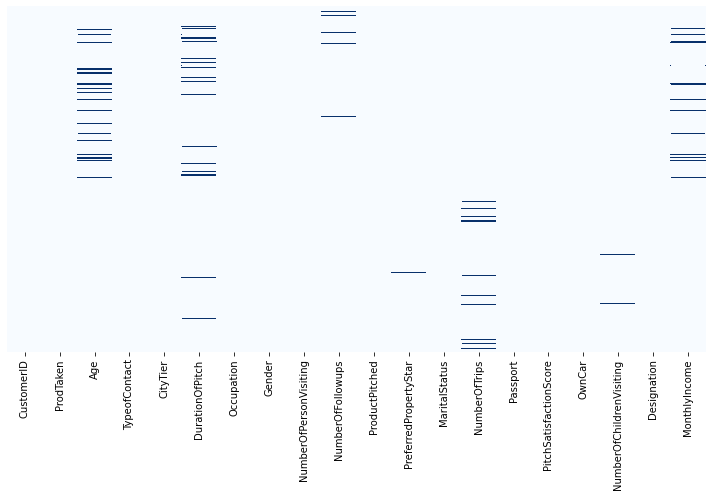

In [ ]:
# visualisasi missing values
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.tight_layout()
plt.savefig('missing_values.png')
plt.show()

### Pengamatan
**1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**
- Data terdiri dari 4888 baris
- Terdapat 5 kolom bertipe rasio, yaitu
  1. `Age`
  2. `DurationOfPitch`
  3. `NumberOfPersonVisiting`
  4. `NumberOfFollowups`
  5. `NumberOfChildrenVisiting`
- 9 kolom bertipe nominal, yaitu
  1. `ProdTaken`
  2. `TypeOfContact`
  3. `Occupation`
  4. `Gender`
  5. `ProductPitched`
  6. `MaritalStatus`
  7. `Designation`
  8. `Passport`
  9. `OwnCar`
- 3 kolom bertipe ordinal, yaitu
  1. `CityTier`
  2. `PreferredPropertyStar`
  3. `PitchSatisfactionScore`
- Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < Jumlah Baris)
- Tidak ada kolom dengan nilai yang tidak sesuai dengan nama kolom
- Tipe data di beberapa kolom kurang tepat:
  1. Age : float --> int
  2. DurationOfPitch : float --> int
  3. NumberOfFollowups : float --> int
  4. PreferredPropertyStar : float --> int
  5. NumberOfTrips : float --> int
  6. NumberOfChildrenVisiting : float --> int


**2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**
- `Age` = 4662 values (226 missing/4.6%)
- `TypeofContact` = 4863 values (25 missing/0.5%)
- `DurationOfPitch` = 4637 values (251 missing/5.1%)
- `NumberOfFollowups` = 4843 values (45 missing/0.9%)
- `PreferredPropertyStar` = 4862 values (26 missing/0.5%)
- `NumberOfTrips` = 4748 values (140 missing/2.9%)
- `NumberOfChildrenVisiting` = 4822 values (66 missing/1.4%)
- `MonthlyIncome` = 4655 values (233 missing/4.8%)


**3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)**

- `Age`, `DurationOfPitch`, `NumberOfTrips`,`MonthlyIncome` memiliki nilai mean yang lebih besar daripada nilai median.
- Lebih dari 50% dari jumlah baris data didominasi oleh Self Enquiry (`TypeofContact`) dan Male (`Gender`)
- `Gender` = Nilai unique Gender (3) tidak rasional (karena ada kesalahan value yaitu Fe Male). Terdapat 155 values dengan label "Fe Male"
- MonthlyIncome : ada value yang tidak rasional di Designation Manager (nilai minimum kurang dari SAR 9000). [Referensi](https://www.glassdoor.co.in/Salaries/riyadh-manager-salary-SRCH_IL.0,6_IM1652_KO7,14.htm)
- MaritalStatus : berdasarkan [referensi](https://www.un.org/en/development/desa/population/publications/dataset/marriage/marital-status.asp) tidak ada marital status unmarried --> diganti single untuk mengurangi ambiguitas
- Nilai min, max, top sudah rasional.


## **Univariate Analysis**

**Individual Boxplots**

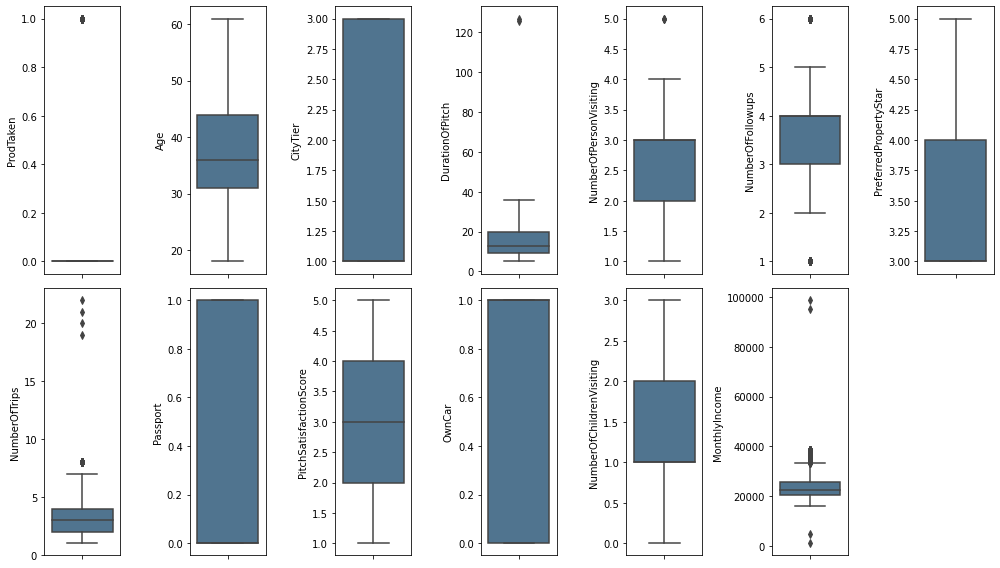

In [ ]:
plt.figure(figsize=(14,8))
for i in range(0, len(nums)):
    plt.subplot(2, int((len(nums)+1)/2), i+1)
    sns.boxplot(y=data[nums[i]], color="#467599", orient='v')
    plt.tight_layout()

In [ ]:
# Check outliers
for col in nums:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    outlier = []
    for x in data[col]:
      if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)
    if len(outlier) != 0 :
      print(f"Kolom {col} memiliki outliers yang berada diluar batas bawah {low_lim} dan batas atas {up_lim}")
      print(f"Outlier di kolom {col} adalah sebanyak {len(outlier)}\n")

Kolom ProdTaken memiliki outliers yang berada diluar batas bawah 0.0 dan batas atas 0.0
Outlier di kolom ProdTaken adalah sebanyak 920

Kolom DurationOfPitch memiliki outliers yang berada diluar batas bawah -7.5 dan batas atas 36.5
Outlier di kolom DurationOfPitch adalah sebanyak 2

Kolom NumberOfPersonVisiting memiliki outliers yang berada diluar batas bawah 0.5 dan batas atas 4.5
Outlier di kolom NumberOfPersonVisiting adalah sebanyak 3

Kolom NumberOfFollowups memiliki outliers yang berada diluar batas bawah 1.5 dan batas atas 5.5
Outlier di kolom NumberOfFollowups adalah sebanyak 312

Kolom NumberOfTrips memiliki outliers yang berada diluar batas bawah -1.0 dan batas atas 7.0
Outlier di kolom NumberOfTrips adalah sebanyak 109

Kolom MonthlyIncome memiliki outliers yang berada diluar batas bawah 12508.5 dan batas atas 33408.5
Outlier di kolom MonthlyIncome adalah sebanyak 345



**Individual Distplot**

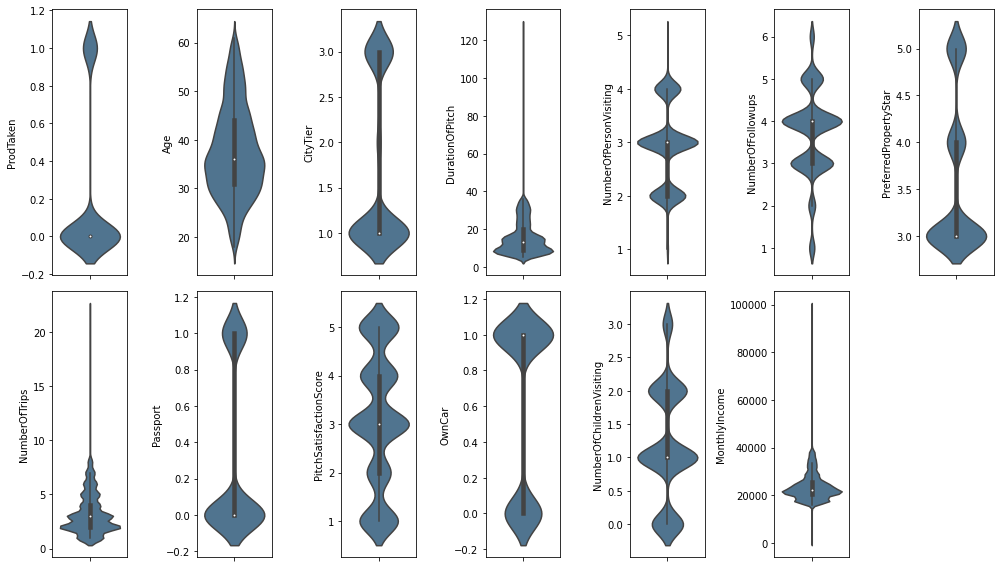

In [ ]:
plt.figure(figsize=(14,8))
for i in range(0, len(nums)):
    plt.subplot(2, int((len(nums)+1)/2), i+1)
    sns.violinplot(y=data[nums[i]], color="#467599", orient='v')
    plt.tight_layout()

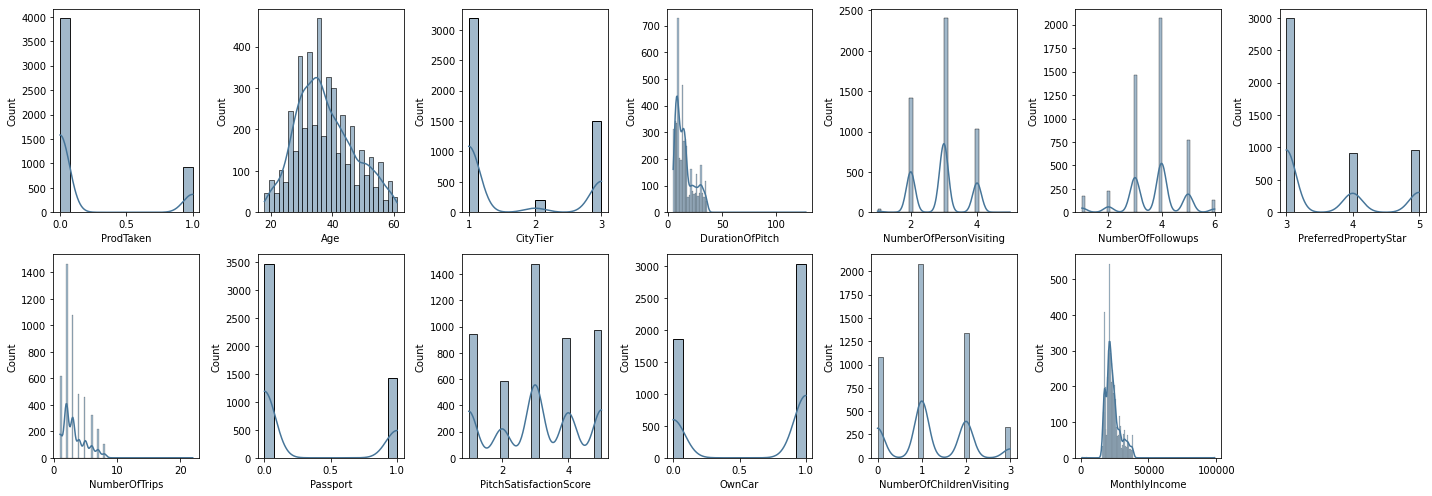

In [ ]:
features = nums
plt.figure(figsize=(20,7))
for i in range(0, len(nums)):
    plt.subplot(2, int((len(nums)+1)/2), i+1)
    sns.histplot(x=data[features[i]], color="#467599", kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

*   Feature `Age` berdistribusi mendekati distribusi normal, karena perbedaan mean median tidak terlalu signifikan.
* Distribusi feature `DurationOfPitch`, `NumberOfTrips`, dan `MonthlyIncome` skew ke kanan (positif).
*   Feature `NumberOfPersonVisiting`, `NumberOfFollowups`, `NumberOfChildrenVisiting`, `CityTier`, dan `PreferredPropertyStar`, PitchSatisfactionScore berdistribusi multimodal.
* Feature `ProdTaken`, `Passport`, dan `OwnCar` berdistribusi bimodal.
*   Feature `ProdTaken` terlihat didominasi oleh value 0 (imbalance data)






**Individual Countplot**

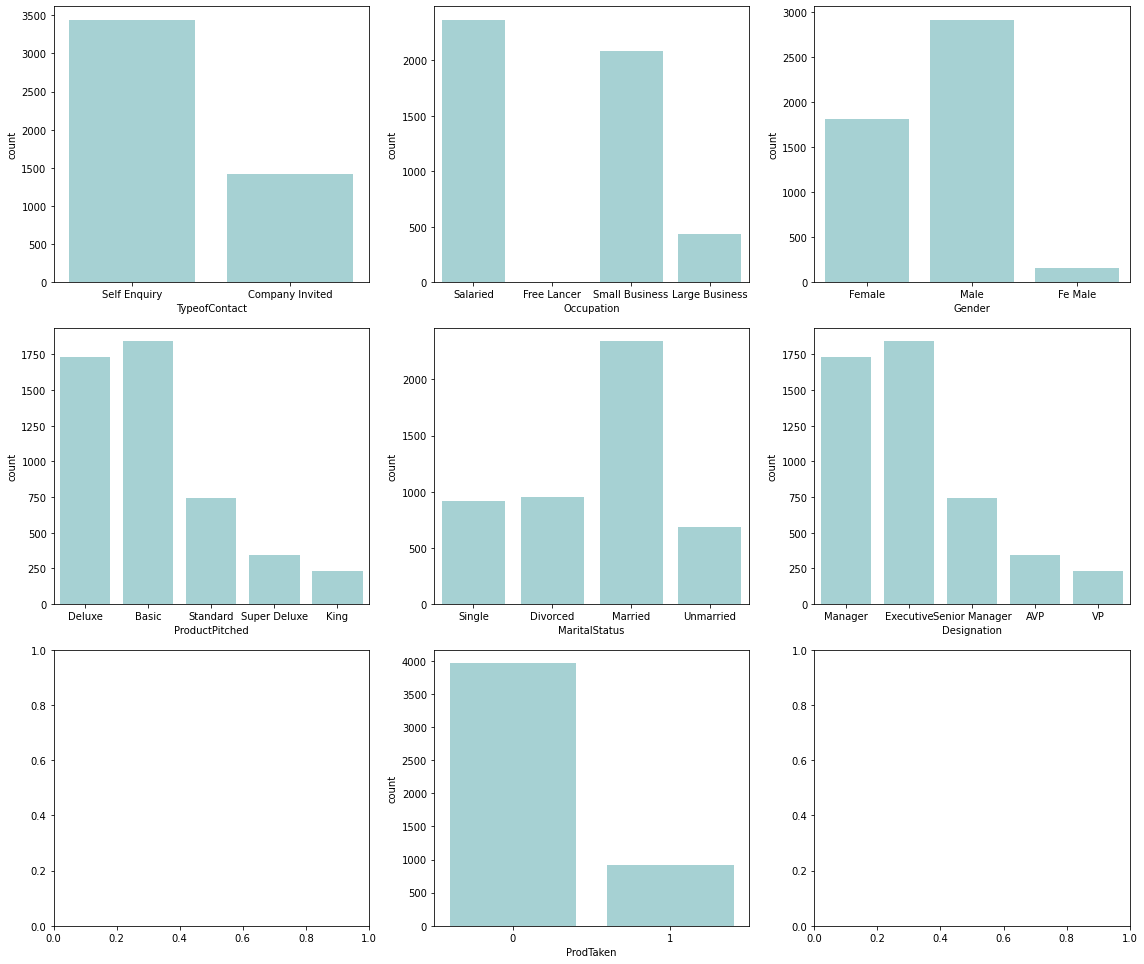

In [ ]:
# Pengamatan variabel categorical
fig, axes = plt.subplots(3, 3, figsize=(16,13.5));
for c in range(0, len(cats)):
    plt.subplot(3, 3, c+1)
    sns.countplot(x = data[cats[c]], color="#9ed8db", orient='v')
sns.countplot(x = data['ProdTaken'], color="#9ed8db", orient='v', ax=axes[2][1])
plt.tight_layout()
plt.show()

1. `Gender` : Nilai unique Gender (3) tidak rasional (karena ada kesalahan value yaitu Fe Male).
2. Frekuensi pada kolom target ProdTaken antara kelas 0 dan 1 terlalu timpang, sehimgga menyebabkan data imbalance.
3. Produk yang paling banyak dibooking adalah Deluxe dan Basic
4. 71% `TypeOfContact` adalah self inquiry, ini artinya upaya dari internal tidak maksimal karena berdasarkan data masih mengandalkan permintaan yang diinisialisasi oleh calon traveller dan 82% hasilnya tidak ambil travel package.

Yang perlu di follow up saat data preprocessing:

1. Mengatasi outlier --> menghapus baris yang nilainya hilang karena persentase missing value <= 5%.
2. Mengatasi imbalance data pada label dengan cara oversampling teknik SMOTE.
3. Mengatasi value yang tidak rasional
4. Melakukan standarisasi

## **Multivariate Analysis**

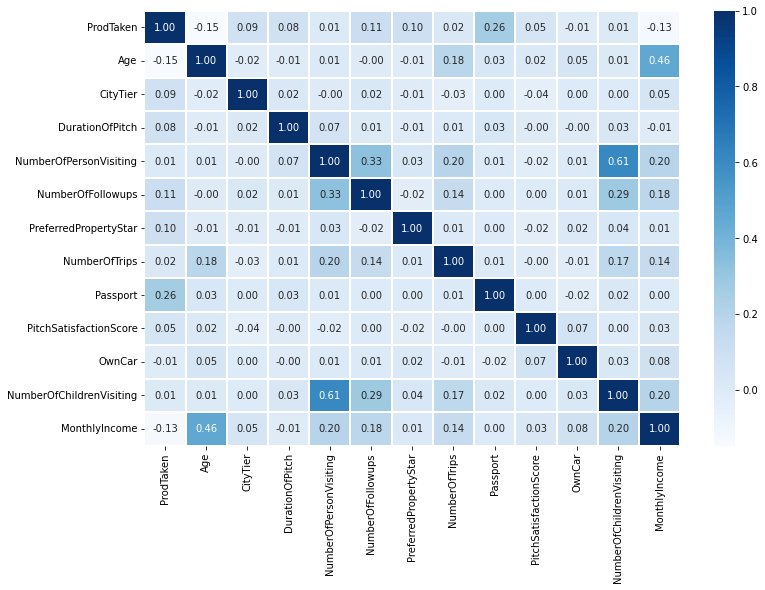

In [ ]:
# Check correlation of features
bc = data.drop(['CustomerID'], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(bc.corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1)

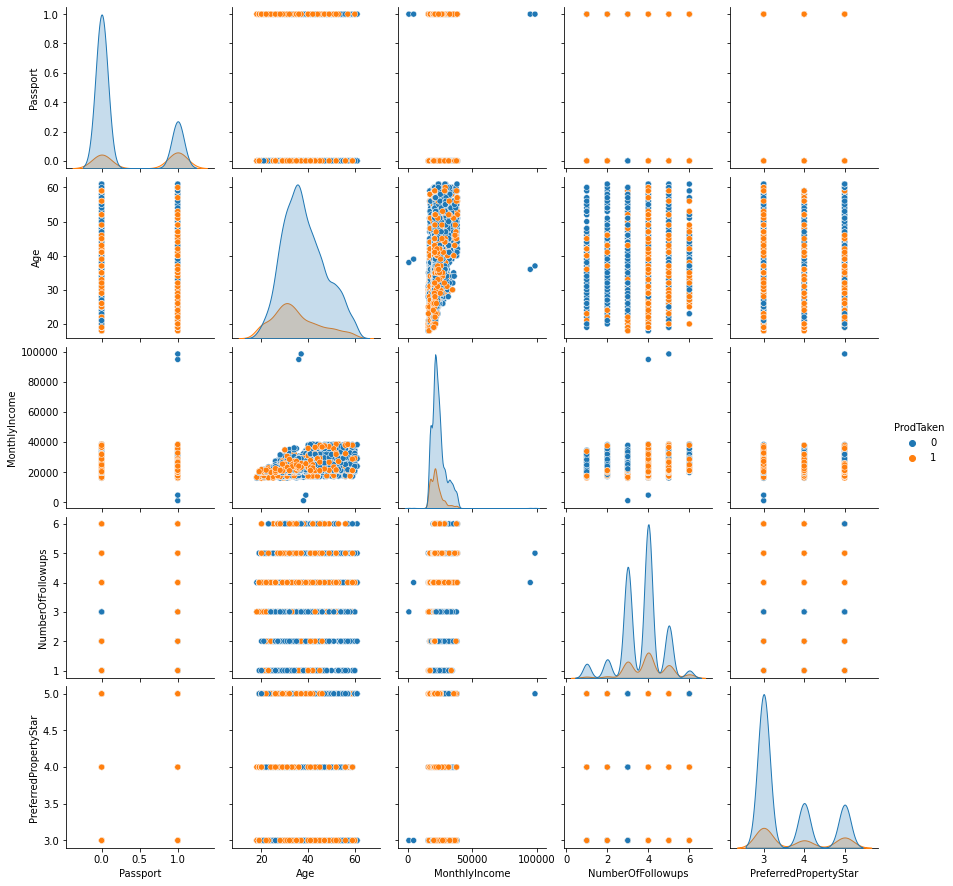

In [ ]:
# Pairplot for most corellated feature with ProdTaken
ft_corr = ['ProdTaken','Passport','Age','MonthlyIncome','NumberOfFollowups', 'PreferredPropertyStar']
sns.pairplot(data[ft_corr], hue='ProdTaken')

In [ ]:
data['Age_group'] = pd.cut(data['Age'],[18, 23, 29, 35, 41, 47, 53, max(data['Age'])], labels=['18 - 23', '24 - 29', '30 - 35', '36 - 41', '42 - 47', '48 - 53', '54 - 61'])
data['DurationPitch_group'] = pd.cut(data['DurationOfPitch'], [5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, max(data.DurationOfPitch)], labels=['5-6', '7-8','9-10','11-12','13-14','15-16','17-18','19-20','21-22','23-24','25+'])

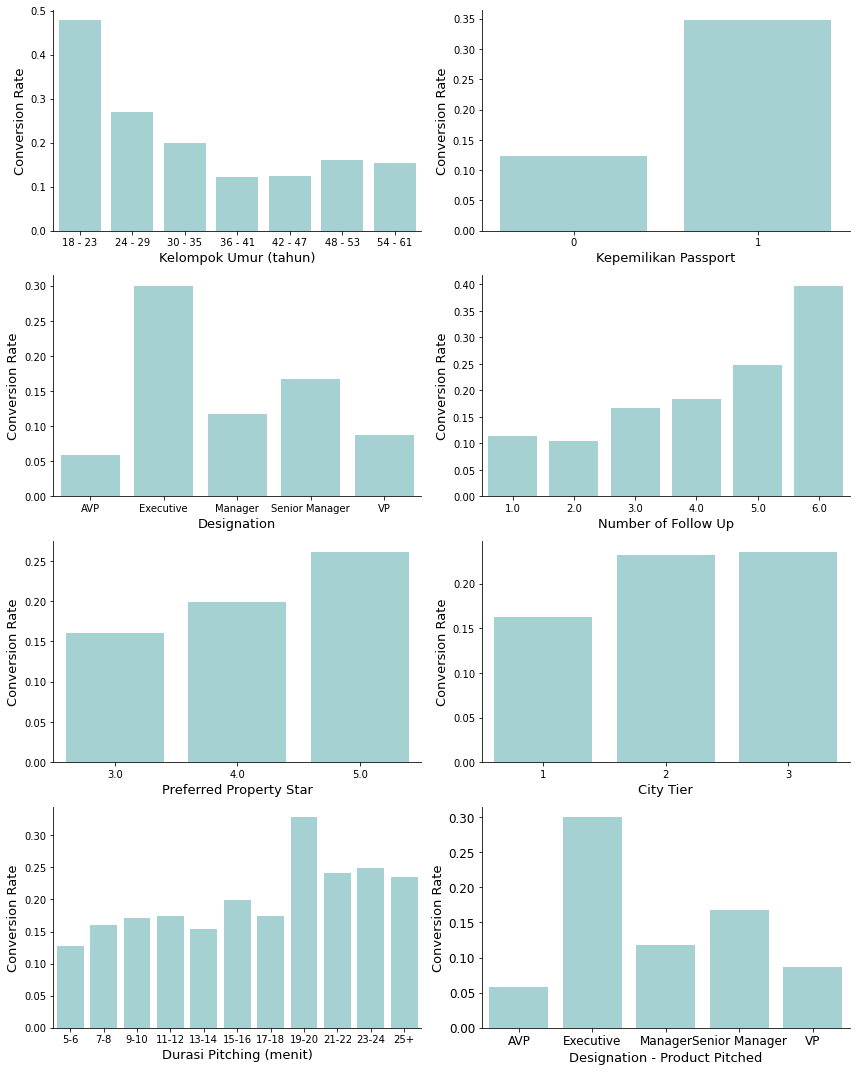

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(4,2, figsize=(12,15))
colors = ["#d64045", "#9ed8db", "#467599", "#1e9f9f"]

age = data.groupby('Age_group')['ProdTaken'].value_counts()/data.groupby('Age_group')['ProdTaken'].count()
age = age.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Age_group', y= 'pct_conv_rate', data=age[age['ProdTaken'] == 1], color="#9ed8db", ax=ax[0][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Kelompok Umur (tahun)', fontsize=13)

passport = data.groupby('Passport')['ProdTaken'].value_counts()/data.groupby('Passport')['ProdTaken'].count()
passport = passport.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Passport', y= 'pct_conv_rate', data=passport[passport['ProdTaken'] == 1], color="#9ed8db", ax=ax[0][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Kepemilikan Passport', fontsize=13)

designation = data.groupby('Designation')['ProdTaken'].value_counts()/data.groupby('Designation')['ProdTaken'].count()
designation = designation.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Designation', y= 'pct_conv_rate', data=designation[designation['ProdTaken'] == 1], color="#9ed8db", ax=ax[1][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Designation', fontsize=13)

fu = data.groupby('NumberOfFollowups')['ProdTaken'].value_counts()/data.groupby('NumberOfFollowups')['ProdTaken'].count()
fu = fu.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='NumberOfFollowups', y= 'pct_conv_rate', data=fu[fu['ProdTaken'] == 1], color="#9ed8db", ax=ax[1][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Number of Follow Up', fontsize=13)

pps = data.groupby('PreferredPropertyStar')['ProdTaken'].value_counts()/data.groupby('PreferredPropertyStar')['ProdTaken'].count()
pps = pps.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='PreferredPropertyStar', y= 'pct_conv_rate', data=pps[pps['ProdTaken'] == 1], color="#9ed8db", ax=ax[2][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Preferred Property Star', fontsize=13)

ct = data.groupby('CityTier')['ProdTaken'].value_counts()/data.groupby('CityTier')['ProdTaken'].count()
ct = ct.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='CityTier', y= 'pct_conv_rate', data=ct[ct['ProdTaken'] == 1], color="#9ed8db", ax=ax[2][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('City Tier', fontsize=13)

duration_pitch = data.groupby('DurationPitch_group')['ProdTaken'].value_counts()/data.groupby('DurationPitch_group')['ProdTaken'].count()
duration_pitch = duration_pitch.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='DurationPitch_group', y= 'pct_conv_rate', data=duration_pitch[duration_pitch['ProdTaken'] == 1], color="#9ed8db", ax=ax[3][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Durasi Pitching (menit)', fontsize=13)

d_pp = data.groupby(['Designation','ProductPitched'])['ProdTaken'].value_counts()/data.groupby(['Designation','ProductPitched'])['ProdTaken'].count()
d_pp = d_pp.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Designation', y= 'pct_conv_rate', data=d_pp[d_pp['ProdTaken'] == 1], color="#9ed8db", ax=ax[3][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Designation - Product Pitched', fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.despine(right=True,top = True)  
plt.tight_layout()
plt.show()

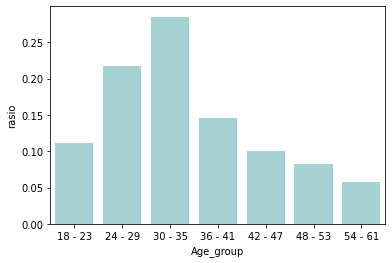

In [ ]:
# Persentase jumlah pelanggan yang membeli paket liburan
data1 = data.groupby('Age_group')['ProdTaken'].sum().reset_index()
data1['rasio'] = round(data1['ProdTaken']/sum(data1['ProdTaken']), 3)
sns.barplot(data=data1, x='Age_group', y='rasio', color="#9ed8db")
plt.show()

### Pengamatan

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan ?**

Berdasarkan nilai korelasi berikut adalah urutan 5 feature yang memiliki korelasi tertinggi terhadap target:
1. `Passport` (berkorelasi positif sebesar 0.26)
2. `Age` (berkorelasi negatif sebesar 0.15)
3. `MonthlyIncome` (berkorelasi negatif sebesar 0.13)
4. `NumberOfFollowups` (berkorelasi positif sebesar 0.11)
5. `PreferredPropertyStar` (berkorelasi positif sebesar 0.10)

Feature `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi yang kuat, sehingga perlu memilih salah satu feature agar menghindari masalah multikolinearitas dan feature `NumberOfPersonVisiting` memiliki nilai korelasi yang lebih tinggi terhadap target daripada feature `NumberOfChildrenVisiting`. Sehingga feature `NumberOfChildrenVisiting` dapat dieliminasi.

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa perlu yang dilakukan terhadap feature itu?**

1. Jumlah customer yang di follow up sebanyak 3-4 kali sangat tinggi, namun conversion rate (ProdTaken=1) kelompok tersebut cukup rendah yaitu sekitar 16-18%. Hal ini menunjukkan bahwa kemungkinan customer tidak tertarik pada penawaran sales. Oleh karena itu diperlukan penawaran menarik untuk customer saat melakukan follow up ke-3 dan ke-4.
2. Customer kebanyakan lebih memilih properti berbintang 3 (PreferredPropertyStar = 3), namun conversion rate (ProdTaken=1) kelompok tersebut hanya 16%.
3. Conversion rate tertinggi dalam pembelian paket liburan terdapat di kelompok customer:
  * Berusia 18-23 tahun
  * Memiliki passport
  * Pekerjaan Executive
4. Durasi pitching paling efektif untuk mendapatkan conversion rate yang tinggi adalah sekitar 19-20 menit. 
5. Semakin sering follow up yang dilakukan sales, maka semakin tinggi conversion rate. Conversion rate tertinggi diperoleh dari jumlah follow up sebanyak 6 kali.
6. Feature Age dan feature MonthlyIncome berkorelasi positif sebesar 0.46. Feature NumberOfPersonVisiting dan feature NumberOfFollowups berkorelasi positif sebesar 0.33. Korelasi ini bahkan lebih kuat daripada korelasi masing-masing terhadap target. 
7. Korelasi antar feature yang lain tidak signifikan.

## **Business Insights**

1. Conversion rate (ProdTaken=1) tertinggi dalam pembelian paket liburan terdapat di kelompok customer:
  * Berusia 18-23 tahun (47.8%%)
  * Memiliki passport (34.7%)
  * Pekerjaan Executive (30%)

  Sehingga kelompok customer ini perlu diprioritaskan dalam marketing paket liburan terbaru.
2. Durasi pitching paling efektif untuk mendapatkan conversion rate yang tinggi adalah sekitar 19-20 menit. Oleh karena itu, SOP telemarketing perlu disusun secara tepat agar dapat memaksimalkan informasi selama periode waktu tersebut.
3. Semakin sering follow up yang dilakukan sales, maka semakin tinggi conversion rate. Conversion rate tertinggi diperoleh dari jumlah follow up sebanyak 6 kali.
4. Jumlah customer yang di follow up sebanyak 3-4 kali sangat tinggi, namun conversion rate (ProdTaken=1) kelompok tersebut cukup rendah yaitu sekitar 16-18%. Hal ini menunjukkan bahwa kemungkinan customer tidak tertarik pada penawaran sales. Oleh karena itu diperlukan penawaran menarik untuk customer saat melakukan follow up ke-3 dan ke-4.
5. Designation ‘Executive’ dengan Product Pitched 'Basic' merupakan kombinasi yang menghasilkan conversion rate paling tinggi, yaitu 30%. Sebanyak 552 dari 1842 Executive berhasil closing produk ‘Basic’. Nilai ini berkontribusi sebesar 60% dari total conversion rate.
6. 71% TypeOfContact adalah self inquiry, hal ini berarti upaya dari tim marketing kurang maksimal karena masih mengandalkan permintaan yang diinisiasi oleh calon traveller.
7. Kelompok usia yang paling banyak ambil paket travel adalah usia 30-35, yaitu sebanyak 247 orang atau 27% dari total conversion rate. Dari sini kita bisa membuat strategi untuk tim marketing agar menyesuaikan materi iklannya dengan konten yang sesuai untuk usia 30-35. Misalnya di usia tersebut kebanyakan orang baru menikah atau mulai serius menjalin hubungan, maka coba buat promo paket travel khusus untuk pasangan.